# HomeWork - The Survivor of Titanic 
## a descriptive analytics
@author: Akhmad Syakhlani / 78221

#Import libraries necessary for this project

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#Load the Titanic dataset

In [2]:
#titanic = pd.read_csv (r'D:\Users\akhmadsya\Downloads\titanic.csv')
train_df = pd.read_csv(r'D:\Users\akhmadsya\Downloads\train.csv')
#test_df = pd.read_csv(r"D:\Users\akhmadsya\Downloads\test.csv")

#Data Exploration/Analysis

In [3]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [5]:
print(train_df.shape)
print(train_df.columns)

(891, 12)
Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


#The training-set has 891 examples and 11 features + the target variable (survived).<br> 
 2 of the features are floats, 5 are integers and 5 are objects.<br> 
 Below I have listed the features with a short description:<br>
 
     'Survived': Survival, key : 0=No, 1=Yes 
     'Pclass'  : Ticket class, key : 1=1st, 2=2nd, 3=3rd 
     'Name'    : Passenger Name
     'Sex'     : Sex     
     'Age'     : Age in years
     'Sibsp'   : # of siblings / spouses aboard the Titanic
     'Parch'   : # of parents / children aboard the Titanic
     'Ticket'  : Ticket number  
     'Fare'    : Passenger fare     
     'Cabin'   : Cabin number
     'Embarked': Port of Embarkation, key : C=Cherbourg, Q=Queenstown, S=Southampton


In [6]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


From the table above, we can note a few things.<br>
First of all, that we need to convert a lot of features into numeric ones later on.<br>
We can also spot some more features, that contain missing values (NaN = not a number), that wee need to deal with.<br>
Let’s take a more detailed look at what data is actually missing:

In [7]:
total = train_df.isnull().sum().sort_values(ascending=False)
percent_1 = train_df.isnull().sum()/train_df.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
print(missing_data.head(5))

          Total     %
Cabin       687  77.1
Age         177  19.9
Embarked      2   0.2
Fare          0   0.0
Ticket        0   0.0


The Embarked feature has only 2 missing values, which can easily be filled.
It will be much more tricky, to deal with the ‘Age’ feature, which has 177 missing values.
The ‘Cabin’ feature needs further investigation, but it looks like that we might want to drop it from the dataset, since 77 % of it are missing.

Above you can see the 11 features + the target variable (survived). 
What features could contribute to a high survival rate ?
To me it would make sense if everything except ‘PassengerId’, ‘Ticket’ and ‘Name’ would be correlated with a high survival rate.

In [109]:
print(abs(train_df.corr()['Survived']).sort_values(ascending=False))

Survived       1.000000
Pclass         0.338481
Fare           0.257307
Parch          0.081629
Age            0.077221
SibSp          0.035322
PassengerId    0.005007
Name: Survived, dtype: float64


since 'Sex' variable is not numeric feature, we still can sense it as one of contributor feature to survival rate since we can count it with this code :

In [9]:
print('Total Passengers grouped by its gender :',train_df['Sex'].count())
print(train_df.groupby('Sex').size())

Total Passengers grouped by its gender : 891
Sex
female    314
male      577
dtype: int64


In [10]:
print('Total Not Survived Passengers grouped by its gender :',train_df[train_df.Survived==0]['Sex'].count())
print(train_df[train_df.Survived==0].groupby('Sex').size())


Total Not Survived Passengers grouped by its gender : 549
Sex
female     81
male      468
dtype: int64


In [11]:
print('Total Survived Passengers grouped by its gender :',train_df[train_df.Survived==1]['Sex'].count())
print(train_df[train_df.Survived==1].groupby('Sex').size())

Total Survived Passengers grouped by its gender : 342
Sex
female    233
male      109
dtype: int64


In [12]:
survived_gender=train_df.groupby(['Survived','Sex'])['PassengerId'].nunique().reset_index(name='#Passenger')\
.sort_values(by='Survived')
print(survived_gender)

   Survived     Sex  #Passenger
0         0  female          81
1         0    male         468
2         1  female         233
3         1    male         109


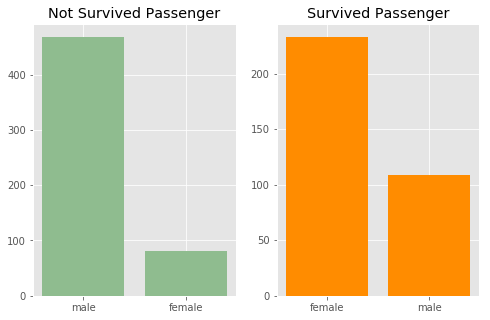

In [13]:
plt.style.use('ggplot')
#plt.style.use('seaborn-muted')

not_survive=train_df[train_df.Survived==0]
survive=train_df[train_df.Survived==1]
# create a figure and axis
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8,5))
#scatter
ax1.bar(not_survive.Sex.unique(),not_survive.Sex.value_counts(),color='darkseagreen')
ax2.bar(survive.Sex.unique(),survive.Sex.value_counts(),color='darkorange')

#ax2.bar(Sex, physical_sciences, color='blue')

#set_title
ax1.set_title('''Not Survived Passenger''')
ax2.set_title('''Survived Passenger''');

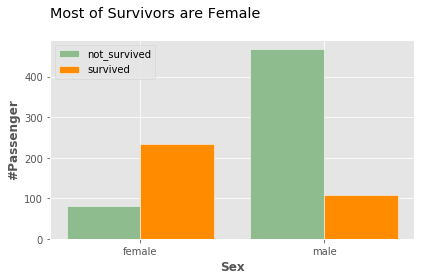

In [14]:
#change style
plt.style.use('seaborn-muted')

#set width of bar
bar_width = 0.4

#set heigth of bar
not_survived_bar = survived_gender.iloc[:2,2].values
survived_bar = survived_gender.iloc[2:,2].values

#set position of bar on X axis
r1 = np.arange(len(not_survived_bar))
r2 = [x + bar_width for x in r1]

#make the plot
plt.bar(r1,not_survived_bar, width=bar_width,label='not_survived',edgecolor='white',color='darkseagreen')
plt.bar(r2,survived_bar,width=bar_width,label='survived',edgecolor='white',color='darkorange')

#add xticks on the middle of the group bars
plt.xlabel('Sex',fontweight='bold')
plt.ylabel('#Passenger',fontweight='bold')
plt.xticks([r + bar_width/2 for r in range(len(not_survived_bar))], ['female','male'])

plt.legend(loc='best')
plt.title("Most of Survivors are Female\n ",loc='left')
plt.tight_layout()
plt.show()

after we know that the sex variable has a correlation with survival rates as we have described above, then we will next discuss other variables that also have a correlation with survival rates in this case.

   a.Pclass <br>
    The most correlated variable to survival-rate is the passenger class

                 PassengerId
Survived Pclass             
0        1                80
         2                97
         3               372
1        1               136
         2                87
         3               119


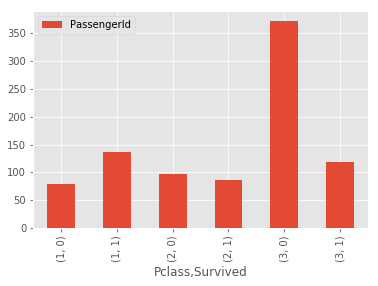

In [98]:
print(train_df[['Survived','Pclass','PassengerId']].groupby(['Survived','Pclass']).count())
train_df[['Pclass','Survived','PassengerId']].groupby(['Pclass','Survived']).count().plot(kind='bar');

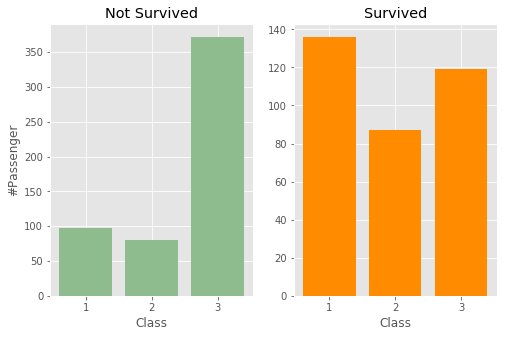

In [69]:
#Survivor based on Passenger_Class

plt.style.use('ggplot')

not_survive=train_df[train_df.Survived==0]
survive=train_df[train_df.Survived==1]

# create a figure and axis
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8,5))

#scatter
ax1.bar(not_survive.Pclass.unique(),not_survive.Pclass.value_counts(),color='darkseagreen')
ax2.bar(survive.Pclass.unique(),survive.Pclass.value_counts(),color='darkorange')

#set_title
ax1.set_title('''Not Survived''')

ax2.set_title('''Survived''')

ax1.set_xlabel('Class')
ax1.set_ylabel('#Passenger')
ax2.set_xlabel('Class');

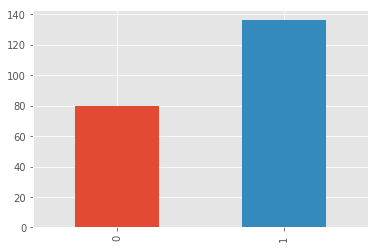

In [125]:
train_df[train_df['Pclass']==1]['Survived'].value_counts().sort_index().plot(kind='bar');

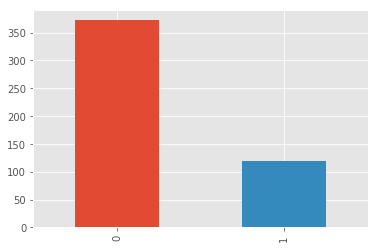

In [124]:
train_df[train_df['Pclass']==3]['Survived'].value_counts().sort_index().plot(kind='bar');

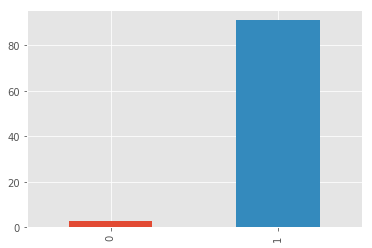

In [121]:
train_df[(train_df['Pclass']==1) & (train_df['Sex']=='female')]['Survived'].value_counts().sort_index().plot(kind='bar');

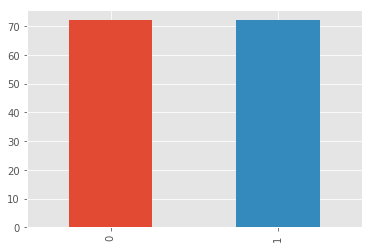

In [122]:
train_df[(train_df['Pclass']==3) & (train_df['Sex']=='female')]['Survived'].value_counts().sort_index().plot(kind='bar');

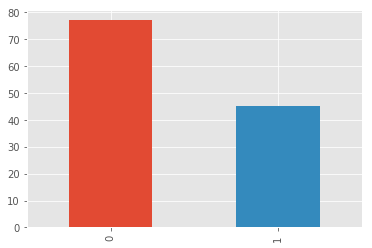

In [117]:
train_df[(train_df['Pclass']==1) & (train_df['Sex']=='male')]['Survived'].value_counts().sort_index().plot(kind='bar');

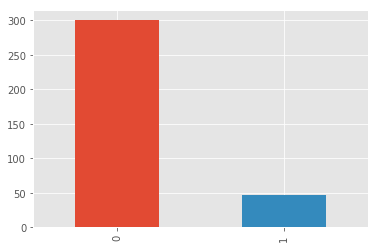

In [118]:
train_df[(train_df['Pclass']==3) & (train_df['Sex']=='male')]['Survived'].value_counts().sort_index().plot(kind='bar');

Here we see clearly, that Pclass is contributing to a persons chance of survival especially if this person is in class 1.

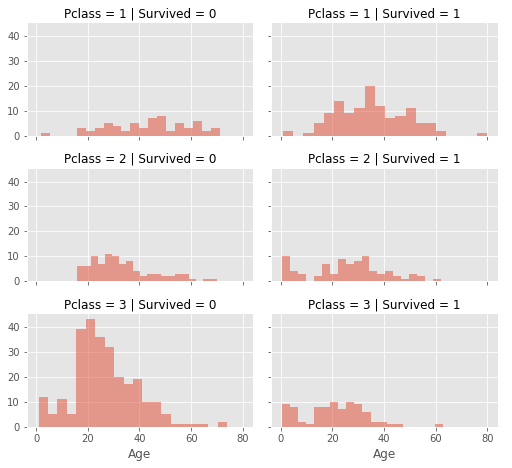

In [120]:
#We will create another pclass plot below.
import seaborn as sns
grid = sns.FacetGrid(train_df, col='Survived', row='Pclass', height=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

   4.Age <br>
    one of correlated variable to survival-rate is the passenger Age

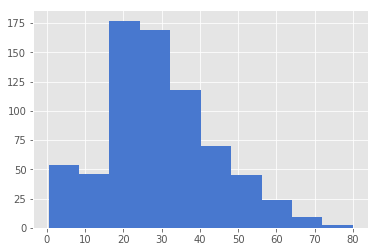

In [26]:
train_df.Age.hist()

In [129]:
#menambahkan kolom baru yaitu AgeBin atau rentang usia karena variasi usia terlalu besar
bins= [0,10,20,30,40,50,60,70,80]
train_df['AgeBin']= pd.cut(train_df['Age'],bins)
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeBin
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,"(20, 30]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,"(30, 40]"
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,"(20, 30]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,"(30, 40]"
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,"(30, 40]"


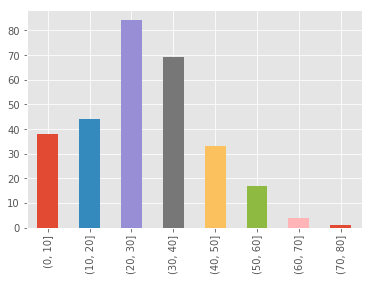

In [136]:
train_df[train_df['Survived']==1]['AgeBin'].value_counts().sort_index().plot(kind='bar');

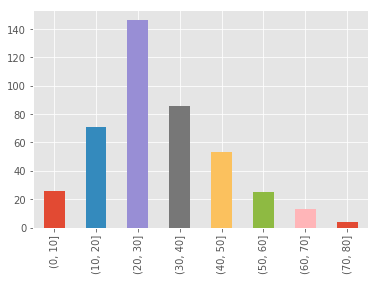

In [137]:
train_df[train_df['Survived']==0]['AgeBin'].value_counts().sort_index().plot(kind='bar');

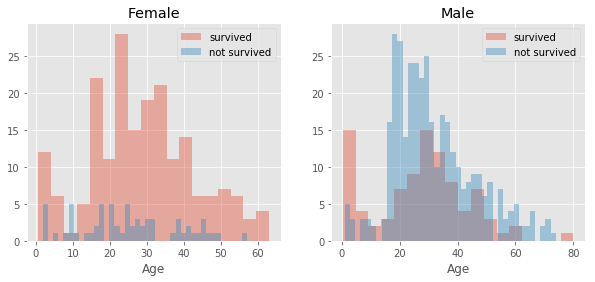

In [179]:
survived = 'survived'
not_survived = 'not survived'
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(10, 4))
women = train_df[train_df['Sex']=='female']
men = train_df[train_df['Sex']=='male']
ax = sns.distplot(women[women['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[0], kde =False)
ax = sns.distplot(women[women['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[0], kde =False)
ax.legend()
ax.set_title('Female')
ax = sns.distplot(men[men['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[1], kde = False)
ax = sns.distplot(men[men['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[1], kde = False)
ax.legend()
_ = ax.set_title('Male')

You can see that men have a high probability of survival when they are between 18 and 30 years old, which is also a little bit true for women but not fully. For women the survival chances are higher between 14 and 40.
For men the probability of survival is very low between the age of 5 and 18, but that isn’t true for women. Another thing to note is that infants also have a little bit higher probability of survival.

3.based on Fare

In [149]:
#train_df[train_df['Survived']==1]['Fare'].value_counts()
bins_fare= [0,50,100,150,200,250,300,350,400,450,500,550]
train_df['FareBin']= pd.cut(train_df['Fare'],bins_fare)
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeBin,FareBin
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,"(20, 30]","(0, 50]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,"(30, 40]","(50, 100]"
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,"(20, 30]","(0, 50]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,"(30, 40]","(50, 100]"
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,"(30, 40]","(0, 50]"


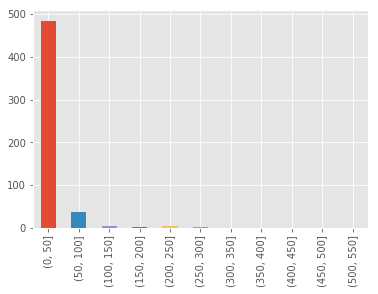

In [151]:
train_df[train_df['Survived']==0]['FareBin'].value_counts().sort_index().plot(kind='bar');

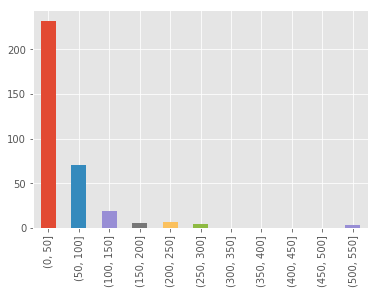

In [152]:
train_df[train_df['Survived']==1]['FareBin'].value_counts().sort_index().plot(kind='bar');

AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


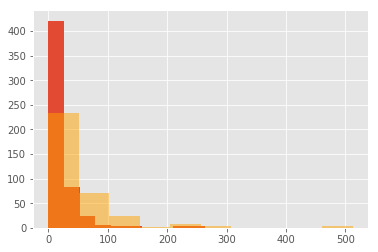

In [158]:
print(train_df[train_df.Survived==0].Fare.hist())
print(train_df[train_df.Survived==1].Fare.hist(alpha=0.5,color='orange'))

AxesSubplot(0.125,0.125;0.775x0.755)


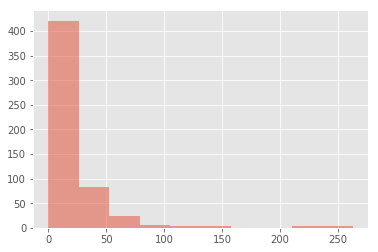

In [159]:
print(train_df[train_df.Survived==0].Fare.hist(alpha=0.5))

AxesSubplot(0.125,0.125;0.775x0.755)


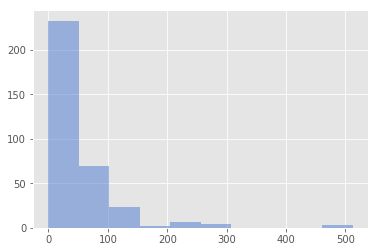

In [32]:
print(train_df[train_df.Survived==1].Fare.hist(alpha=0.5))

4.based on Port of Embarkation

                   PassengerId
Survived Embarked             
0        C                  75
         Q                  47
         S                 427
1        C                  93
         Q                  30
         S                 217


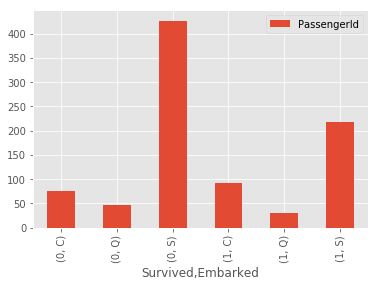

In [229]:
print(train_df[['Survived','Embarked','PassengerId']].groupby(['Survived','Embarked']).count())
train_df[['Survived','Embarked','PassengerId']].groupby(['Survived','Embarked']).count().plot(kind='bar');

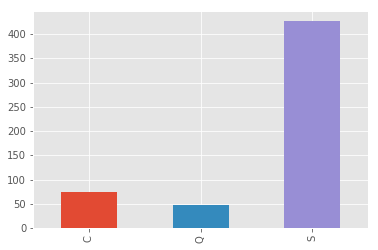

In [161]:
train_df[train_df['Survived']==0]['Embarked'].value_counts().sort_index().plot(kind='bar');

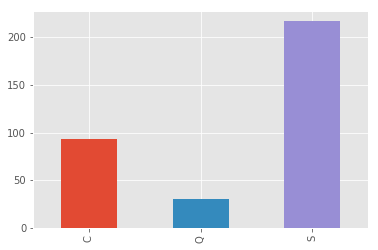

In [162]:
train_df[train_df['Survived']==1]['Embarked'].value_counts().sort_index().plot(kind='bar');

In [218]:
print("Penumpang yang tidak selamat dari seluruh Embarkasi ada",train_df[train_df['Survived']==0].Embarked.count())
not_survive.Embarked.value_counts()

Penumpang yang tidak selamat dari seluruh Embarkasi ada 549


S    427
C     75
Q     47
Name: Embarked, dtype: int64